In [26]:
import shutil
import scipy.special as special
from ipy             import *
from FPI_util_funcs  import *
from OpPt_util_funcs import *

%matplotlib inline

In [ ]:
def gaussian(x,a,c):
    return a*np.exp(-x**2/(2*c**2))

In [ ]:
def lorentzian(x,a,c):
    return a/(1+(x/c)**2)

In [ ]:
def gamma(x,a,b,c):
    return c*x**(a-1)*np.exp(-x*b)

In [46]:
def assess_counts(CDF_filename):
    skippy  = pycdf.CDF(CDF_filename)
    ThrshV  = np.asarray(skippy['mms2_des0_ThrshV'])
    Counts0 = np.asarray(skippy['mms2_des0_counts_Head0'])
    A = period_fold(ThrshV,16)/(1024/16)
    B = period_fold(Counts0[:,15],16)/(1024/16)
    V = np.linspace(0,3.5,100)
    C = gaussian(V,800,1)
    D = lorentzian(V,800,1)
    poptL, pcovL = opt.curve_fit(lorentzian,A,B,p0=[800,1])
    poptG, pcovG = opt.curve_fit(gaussian,A,B,p0=[800,1])
    DL = lorentzian(V,poptL[0],poptL[1])
    DG = gaussian(V,poptG[0],poptG[1])
    
    plt.plot(A,B,'r.',label='Actual')
    plt.plot(V,DL,'b-',label='Lorentzian')
    plt.plot(V,DG,'k--',label='Gaussian')
    plt.xlabel('A121 Voltage (V)')
    plt.ylabel('Counts')
    plt.legend(loc='best')
    
    skippy.close()

In [5]:
unit        = 'FM203'
head0       = 'H0'
head1       = 'H1'
start_orb   = 511
end_orb     = 1000
obs, bay    = serial_num_to_sc(unit)

Thrsh_V_str = '%s_%s_ThrshV'       % (obs, bay)
Counts0_str = '%s_%s_counts_Head0' % (obs, bay)
Counts1_str = '%s_%s_counts_Head1' % (obs, bay)

In [6]:
base_dir = 'x:/data/ftp/mms2/fpi/cal/OpPtCal/'
OpPt_CDFs = find_oppt_CDFs(base_dir,start_orb,end_orb,unit)

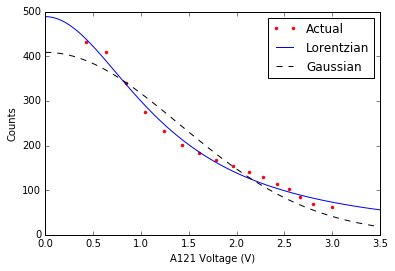

In [65]:
assess_counts(my_list1[2])

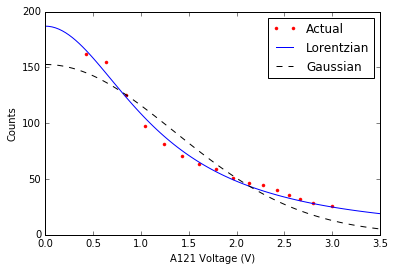

In [66]:
assess_counts(my_list1[3])

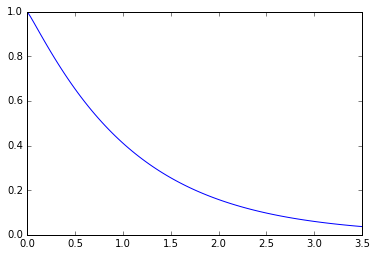

In [62]:
V = np.linspace(0,3.5,100)
GV = special.gammaincc(1.1,V)
plt.plot(V,GV)

In [63]:
my_list1

['x:/data/ftp/mms2/fpi/cal/OpPtCal/0517_20160808_1345-20160809_1338/cdf/OpPt/mms2_des0_engr_l1_sigthrsh_20160808134551_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0517_20160808_1345-20160809_1338/cdf/OpPt+50/mms2_des0_engr_l1_sigthrsh_20160808134551_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0518_20160809_1338-20160810_1331/cdf/OpPt/mms2_des0_engr_l1_sigthrsh_20160809133847_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0518_20160809_1338-20160810_1331/cdf/OpPt+50/mms2_des0_engr_l1_sigthrsh_20160809133847_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0522_20160813_1311-20160814_1304/cdf/OpPt/mms2_des0_engr_l1_sigthrsh_20160813131105_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0522_20160813_1311-20160814_1304/cdf/OpPt+50/mms2_des0_engr_l1_sigthrsh_20160813131105_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0526_20160817_1243-20160818_1236/cdf/OpPt/mms2_des0_engr_l1_sigthrsh_20160817124342_v1.2.0.cdf',
 'x:/data/ftp/mms2/fpi/cal/OpPtCal/0526_20160817_1243-20160818_1236